In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [3]:
# result_folder = "../run/results/2d_experiment/"
# result_folder = "../run/results/three_by_three_deep_shallow/"
# result_folder = "../run/results/four_by_four_wide/"
result_folder = "../run/results/eleven_by_eleven/"
result_folder = "../run/results/seed_5_eleven/"
result_folder = "../run/results/seed_10_eleven/"
experiments = os.listdir(result_folder)

In [78]:
import torch

In [117]:
head_0_norms = {}
head_1_norms = {}

feature_weights_0 = {}
feature_weights_1 = {}

feature_0_frob = {}
feature_1_frob = {}

head_weights_0 = {}
head_weights_1 = {}

for exp_dir in experiments:
    if not exp_dir.endswith(".pdf") and not exp_dir.startswith("."):
        teacher_weight_0_path = os.path.join(result_folder, exp_dir, '0', 'teacher_weights_0')
        teacher_weight_1_path = os.path.join(result_folder, exp_dir, '0', 'teacher_weights_1')
        
        teacher_weights_0 = torch.load(teacher_weight_0_path)
        teacher_weights_1 = torch.load(teacher_weight_1_path)
        
        feature_0 = teacher_weights_0["_layers.0.weight"]
        feature_1 = teacher_weights_1["_layers.0.weight"]
        
        feature_weights_0[exp_dir] = feature_0
        feature_weights_1[exp_dir] = feature_1
        
        feature_0_frob[exp_dir] = torch.sqrt(torch.trace(torch.matmul(feature_0, feature_0.T)))
        feature_1_frob[exp_dir] = torch.sqrt(torch.trace(torch.matmul(feature_1, feature_1.T)))
        
        head_weights_0[exp_dir] = teacher_weights_0["_head.weight"]
        head_weights_1[exp_dir] = teacher_weights_1["_head.weight"]
        
        head_0_norms[exp_dir] = torch.norm(teacher_weights_0["_head.weight"])
        head_1_norms[exp_dir] = torch.norm(teacher_weights_1["_head.weight"])

In [126]:
np.std([t.item() for t in list(feature_1_frob.values())])

0.22660423204617014

In [105]:
eg_1 = head_weights_1['feature_0.30000000000000004_readout_0.6']
eg_0 = head_weights_0['feature_0.30000000000000004_readout_0.6']

In [108]:
torch.matmul(eg_0, eg_1.T) / (torch.norm(eg_1) * torch.norm(eg_0))

tensor([[0.6000]])

In [6]:
experiments

['feature_0.30000000000000004_readout_0.1',
 'feature_0.30000000000000004_readout_0.8',
 'feature_1.0_readout_0.30000000000000004',
 'feature_0.7_readout_0.7000000000000001',
 'feature_0.1_readout_0.30000000000000004',
 'feature_0.8_readout_0.8',
 'feature_0.1_readout_0.0',
 'feature_0.1_readout_0.9',
 'feature_0.5_readout_0.4',
 'feature_0.0_readout_0.6000000000000001',
 'feature_0.8_readout_0.1',
 'feature_0.30000000000000004_readout_0.9',
 'feature_0.30000000000000004_readout_0.0',
 'feature_0.5_readout_0.5',
 'feature_0.8_readout_0.0',
 'feature_0.5_readout_0.2',
 'feature_0.1_readout_0.8',
 'feature_0.1_readout_0.1',
 'feature_0.4_readout_0.30000000000000004',
 'feature_0.8_readout_0.9',
 '.DS_Store',
 'feature_0.9_readout_0.4',
 'feature_0.4_readout_0.1',
 'feature_0.4_readout_0.8',
 'feature_0.0_readout_0.2',
 'feature_0.0_readout_0.5',
 'feature_0.7_readout_0.6000000000000001',
 'feature_0.0_readout_0.7000000000000001',
 'feature_0.0_readout_0.4',
 'feature_0.4_readout_0.9',
 '

In [7]:
dfs = {(exp.split("_")[1], exp.split("_")[3]): pd.read_csv(os.path.join(result_folder, exp, "10", "network_log.csv")) for exp in experiments if (not exp.startswith(".") and not exp.endswith(".pdf"))}

<AxesSubplot:>

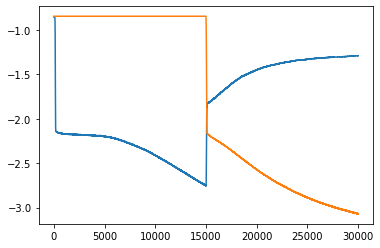

In [8]:
dfs[list(dfs.keys())[0]].log_generalisation_error_0.plot()
dfs[list(dfs.keys())[0]].log_generalisation_error_1.plot()

<AxesSubplot:>

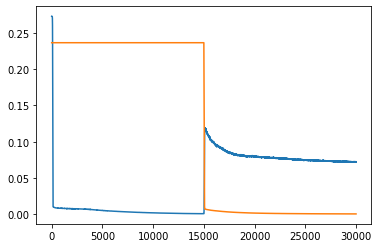

In [47]:
dfs[list(dfs.keys())[5]].generalisation_error_0.plot()
dfs[list(dfs.keys())[5]].generalisation_error_1.plot()

In [48]:
len(dfs[list(dfs.keys())[0]].generalisation_error_0)

30000

In [9]:
switch_errors = {k: df.log_generalisation_error_0[14999] for k, df in dfs.items()}

In [10]:
final_errors = {k: df.log_generalisation_error_0[29999] for k, df in dfs.items()}

In [11]:
switch_errors_1 = {k: df.log_generalisation_error_1[14999] for k, df in dfs.items()}

In [12]:
final_errors_1 = {k: df.log_generalisation_error_1[29999] for k, df in dfs.items()}

In [13]:
forgetting = {k: df.log_generalisation_error_0[29999] - df.log_generalisation_error_0[14999] for k, df in dfs.items()}

In [14]:
forgetting_rate = {k: np.mean([df.log_generalisation_error_0[14999 + i + 1] - df.log_generalisation_error_0[14999 + i] for i in range(10)]) for k, df in dfs.items()}

In [15]:
max_forgetting = {k: np.amax(df.log_generalisation_error_0[14999:]) - df.log_generalisation_error_0[14999] for k, df in dfs.items()}

In [16]:
transfer = {k: df.log_generalisation_error_1[14999] - df.log_generalisation_error_1[29999] for k, df in dfs.items()}

In [17]:
transfer_rate = {k: np.mean([df.log_generalisation_error_1[14999 + i] - df.log_generalisation_error_1[14999 + i + 1] for i in range(10)]) for k, df in dfs.items()}

In [18]:
max_transfer = {k: df.log_generalisation_error_1[14999] - np.amin(df.log_generalisation_error_1[14999:]) for k, df in dfs.items()}

In [19]:
x, y = np.meshgrid(np.linspace(0, 1, 11), np.linspace(0, 1, 11))

In [20]:
unique_sorted_keys = np.unique([i[0] for i in sorted(list(forgetting.keys()), key=lambda x: float(x[0]))])
x_overlap_map = {v: i for i, v in enumerate(unique_sorted_keys)}
y_overlap_map = {v: i for i, v in enumerate(np.unique([i[1] for i in sorted(list(forgetting.keys()), key=lambda x: float(x[1]))]))}

In [21]:
x_overlap_map

{'0.0': 0,
 '0.1': 1,
 '0.2': 2,
 '0.30000000000000004': 3,
 '0.4': 4,
 '0.5': 5,
 '0.6': 6,
 '0.7': 7,
 '0.8': 8,
 '0.9': 9,
 '1.0': 10}

In [22]:
y_overlap_map

{'0.0': 0,
 '0.1': 1,
 '0.2': 2,
 '0.30000000000000004': 3,
 '0.4': 4,
 '0.5': 5,
 '0.6000000000000001': 6,
 '0.7000000000000001': 7,
 '0.8': 8,
 '0.9': 9,
 '1.0': 10}

In [23]:
def get_z(value_dict):
    z = np.zeros((11, 11))

    for k, f_value in value_dict.items():
        x_val = k[0]
        y_val = k[1]
        x_index = x_overlap_map[x_val]
        y_index = y_overlap_map[y_val]
        z[x_index][y_index] = f_value
    return z

In [24]:
max_forgetting[('0.0', '1.0')]

1.6003986098163843

{}

<ipython-input-25-fbb13f59e2a3>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


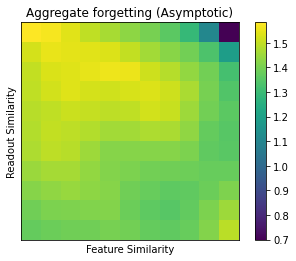

In [25]:
fig = plt.figure()
plt.imshow(get_z(forgetting), origin="lower", extent=[0, 1, 0, 1])
plt.xlabel("Feature Similarity")
plt.ylabel("Readout Similarity")
plt.title("Aggregate forgetting (Asymptotic)")
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.colorbar()
fig.show()
# fig.savefig(os.path.join(result_folder, "aggregate_forgetting_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-26-2dee52db5b96>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


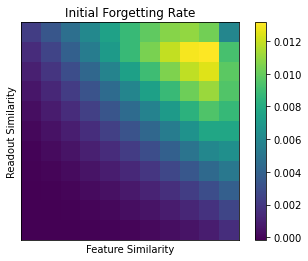

In [26]:
fig = plt.figure()
# plt.pcolormesh(x, y, get_z(forgetting_rate))
plt.imshow(get_z(forgetting_rate), origin="lower", extent=[0, 1, 0, 1])
plt.xlabel("Feature Similarity")
plt.ylabel("Readout Similarity")
plt.title("Initial Forgetting Rate")
plt.colorbar()


plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
# fig.savefig(os.path.join(result_folder, "initial_forgetting_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-27-c4c43b7258dc>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


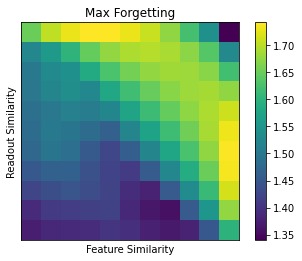

In [27]:
fig = plt.figure()
# plt.pcolormesh(x, y, get_z(max_forgetting))
plt.imshow(get_z(max_forgetting), origin="lower", extent=[0, 1, 0, 1])
plt.xlabel("Feature Similarity")
plt.ylabel("Readout Similarity")
plt.title("Max Forgetting")
plt.colorbar()
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
# fig.savefig(os.path.join(result_folder, "max_forgetting_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-28-f33655b0192c>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


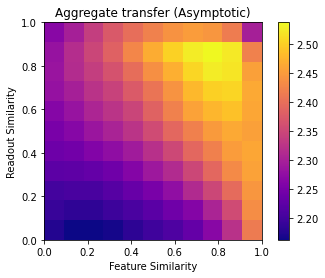

In [28]:
fig = plt.figure()
plt.imshow(get_z(transfer), origin="lower", extent=[0, 1, 0, 1], cmap="plasma")
plt.xlabel("Feature Similarity")
plt.ylabel("Readout Similarity")
plt.title("Aggregate transfer (Asymptotic)")
# plt.tick_params(
#             axis='both',         # changes apply to the x-axis
#             which='both',      # both major and minor ticks are affected
#             bottom=False,      # ticks along the bottom edge are off
#             top=False,         # ticks along the top edge are off
#             labelbottom=False, # labels along the bottom edge are off
#             left=False,
#             labelleft=False
#         ) 
plt.colorbar()
fig.show()
# fig.savefig(os.path.join(result_folder, "aggregate_transfer_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-128-91ab4daee644>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


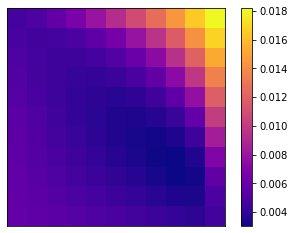

In [128]:
fig = plt.figure()
plt.imshow(get_z(transfer_rate), origin="lower", extent=[0, 1, 0, 1], cmap="plasma")
# plt.xlabel("Feature Similarity")
# plt.ylabel("Readout Similarity")
# plt.title("Initial Transfer Rate")
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.colorbar()
fig.show()
# fig.savefig(os.path.join(result_folder, "initial_transfer_rate_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-129-21603b2ca21f>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


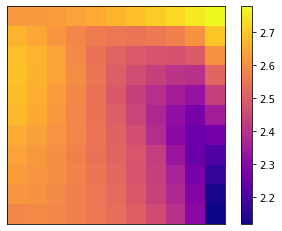

In [129]:
fig = plt.figure()
plt.imshow(get_z(max_transfer), origin="lower", extent=[0, 1, 0, 1], cmap="plasma")
# plt.xlabel("Feature Similarity")
# plt.ylabel("Readout Similarity")
# plt.title("Maximum Transfer")
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.colorbar()
fig.show()
# fig.savefig(os.path.join(result_folder, "maximum_transfer_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

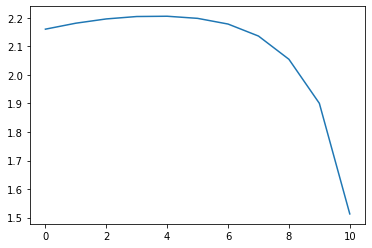

In [76]:
single_row = get_z(max_forgetting)[0]
plt.plot(range(len(single_row)), single_row)

In [189]:
adjusted_forgetting = {k: df.log_generalisation_error_0[second_threshold_steps[k]] - df.log_generalisation_error_0[14999] for k, df in dfs.items()}

adjusted_forgetting_intervals = {k: [df.log_generalisation_error_0[14999 + t] - df.log_generalisation_error_0[14999] for t in [0, 10, 100, 1000, 10000, second_threshold_steps[k] - 14999]] for k, df in dfs.items()}

In [190]:
af_intervals = []
for interval in range(6):
    af_interval = {k: adjusted_forgetting_intervals[k][interval] for k in adjusted_forgetting_intervals.keys()}
    af_intervals.append(af_interval)

readout_ortho_row_intervals = [get_z(i).T[-1] for i in af_intervals]

<ipython-input-204-975e193d4788>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


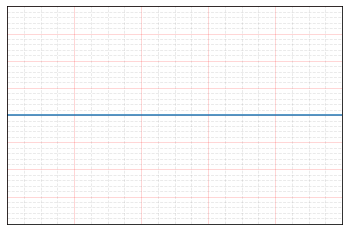

In [204]:
r = readout_ortho_row_intervals[0]
fig = plt.figure()
plt.plot(range(len(r)), r)
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(-0.04, 0.04)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("cross_section_individual_row_0.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-208-70dc26f72f27>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


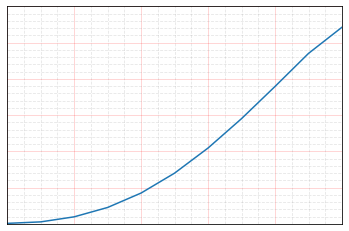

In [208]:
r = readout_ortho_row_intervals[1]
fig = plt.figure()
plt.plot(range(len(r)), r)
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("cross_section_individual_row_10.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-211-ed52c2f549b7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


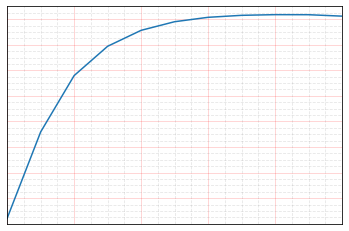

In [211]:
r = readout_ortho_row_intervals[2]
fig = plt.figure()
plt.plot(range(len(r)), r)
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0.4, 2.1)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("cross_section_individual_row_100.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-214-6637390f3ab1>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


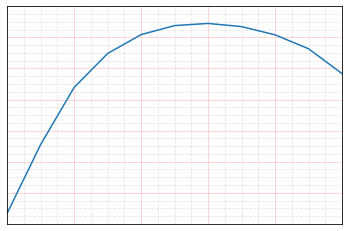

In [214]:
r = readout_ortho_row_intervals[3]
fig = plt.figure()
plt.plot(range(len(r)), r)
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0.6, 2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("cross_section_individual_row_1000.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-217-969f040dae2d>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


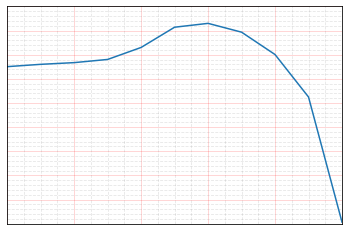

In [217]:
r = readout_ortho_row_intervals[4]
fig = plt.figure()
plt.plot(range(len(r)), r)
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0.8, 1.7)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("cross_section_individual_row_10000.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-222-b7e409646d1c>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


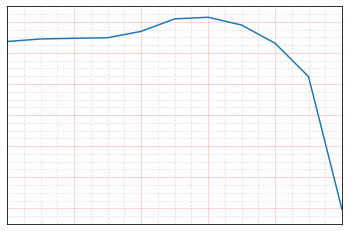

In [222]:
r = readout_ortho_row_intervals[5]
fig = plt.figure()
plt.plot(range(len(r)), r)
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0.3, 1.7)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("cross_section_individual_row_N.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

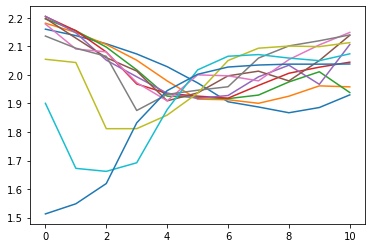

In [202]:
single_column = get_z(max_forgetting)
plt.plot(range(len(single_column)), single_column)

In [159]:
max_tr_z = get_z(max_transfer)
aggregate_tr_z = get_z(transfer)
rate_tr_z = get_z(transfer_rate)

max_for_z = get_z(max_forgetting)
aggregate_for_z = get_z(adjusted_forgetting)
rate_for_z = get_z(forgetting_rate)

<ipython-input-160-68307bfe7684>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


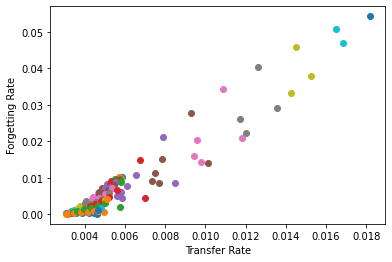

In [160]:
fig = plt.figure()
for i in range(11):
    for j in range(11):
        plt.scatter(rate_tr_z[i][j], rate_for_z[i][j])
plt.xlabel("Transfer Rate")
plt.ylabel("Forgetting Rate")
fig.show()

<ipython-input-161-247e5a5fff9e>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


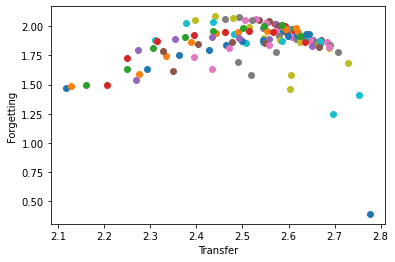

In [161]:
fig = plt.figure()
for i in range(11):
    for j in range(11):
        plt.scatter(aggregate_tr_z[i][j], aggregate_for_z[i][j])
plt.xlabel("Transfer")
plt.ylabel("Forgetting")
fig.show()

<ipython-input-163-e6a59c54bc9b>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


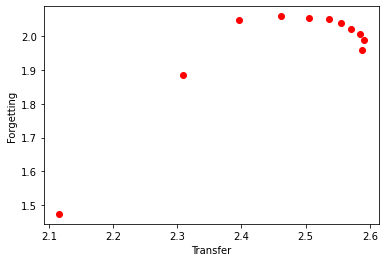

In [163]:
fig = plt.figure()
for i in range(1):
    for j in range(11):
        plt.scatter(aggregate_tr_z[i][j], aggregate_for_z[i][j], color='r')
plt.xlabel("Transfer")
plt.ylabel("Forgetting")
fig.show()

<ipython-input-166-f76b807555e3>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


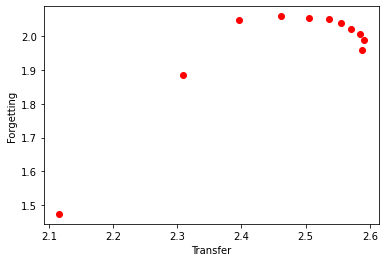

In [166]:
fig = plt.figure()
i = 0
for j in range(11):
    plt.scatter(aggregate_tr_z[i][j], aggregate_for_z[i][j], color='r')
plt.xlabel("Transfer")
plt.ylabel("Forgetting")
fig.show()

<ipython-input-164-9b6413873f21>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


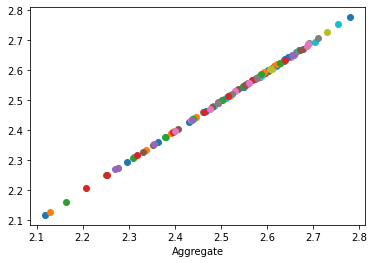

In [164]:
fig = plt.figure()
for i in range(11):
    for j in range(11):
        plt.scatter(max_tr_z[i][j], aggregate_tr_z[i][j])
plt.xlabel("Max")
plt.xlabel("Aggregate")
fig.show()

In [92]:
(min_index[0][0], min_index[1][0])

(0, 10)

In [114]:
get_z(max_forgetting)[0][10]

1.5130220909512597

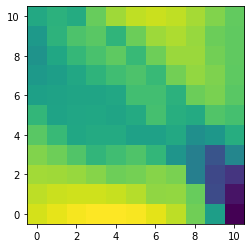

In [122]:
plt.imshow(get_z(max_forgetting), origin="lower")

In [133]:
switch_errors = {k: df.log_generalisation_error_0[14999] for k, df in dfs.items()}

In [134]:
second_threshold_steps = {k: np.where(df.log_generalisation_error_1 < switch_errors[k])[0][0] for k, df in dfs.items()}

In [135]:
adjusted_forgetting = {k: df.log_generalisation_error_0[second_threshold_steps[k]] - df.log_generalisation_error_0[14999] for k, df in dfs.items()}

<ipython-input-139-99d0680e96b1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


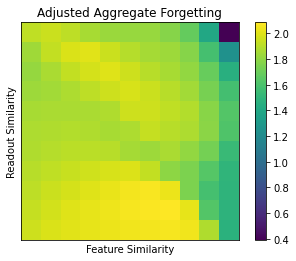

In [139]:
fig = plt.figure()
# plt.pcolormesh(x, y, get_z(max_forgetting))
plt.imshow(get_z(adjusted_forgetting), origin="lower", extent=[0, 1, 0, 1])
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.xlabel("Feature Similarity")
plt.ylabel("Readout Similarity")
plt.title("Adjusted Aggregate Forgetting")
plt.colorbar()
fig.show()
# fig.savefig(os.path.join(result_folder, "adjsuted_aggregate_forgetting_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

In [193]:
results_folder_eleven = "../run/results/eleven_by_eleven/"

In [194]:
adjustded_max_example_df = pd.read_csv(os.path.join(results_folder_eleven, "feature_1.0_readout_0.8", "0", "network_log.csv"))

<ipython-input-198-f8e02de29ecb>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


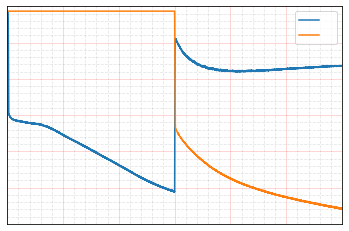

In [198]:
fig = plt.figure()
adjustded_max_example_df["log_generalisation_error_0"].plot(label="  ")
adjustded_max_example_df["log_generalisation_error_1"].plot(label="  ")
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.xlim((0, 30000))
plt.ylim((-3.5, -0.5))
plt.legend()
fig.show()
fig.savefig("adjusted_long_time_example.pdf", dpi=100, bbox_inches='tight', pad_inches=0)